<a href="https://colab.research.google.com/github/jodogwu/Projects-Machine/blob/main/EDA_Bank_Loan_Default_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory Data Analysis- Bank Loan Default Analysis**

**Objective:**

Apply EDA to identify patterns indicating loan repayment difficulties to minimize financial risk in lending.

**Scenario:**

* Insufficient or non-existent credit histories make loan approval
  challenging.
* Consumers may exploit this by defaulting on loans.

**Business Context:**

*   Consumer finance company specializing in urban customer loans.
*   Need to ensure capable applicants are not rejected and risky
    applicants are identified.

**Risk Types:**

*   **Business Loss:** Not approving loans for likely repayers.
*   **Financial Loss:** Approving loans for likely defaulters.


**Data Scenarios:**
Clients with payment difficulties (late payments) and
Clients paying on time.


**Loan Application Decisions:**

*   **Approved**: Loan application approved.
*   **Cancelled**: Client cancelled application.
*   **Refused**: Company rejected loan application.
*   **Unused Offer**: Loan cancelled at different stages.




### **Import Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **Import the Dataset**

In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Load the datasets from Google Drive
previous_df = pd.read_csv('/content/drive/My Drive/previous_application.csv')

Mounted at /content/drive


In [ ]:
# Load the datasets from Google Drive
application_df = pd.read_csv('/content/drive/My Drive/application_data.csv')

### **Display Dataframes**

In [ ]:
previous_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Get the dimensions (number of rows and columns) of each dataset
previous_shape = previous_df.shape
application_shape = application_df.shape

# Print the dimensions
print(f'Previous Application Data: {previous_shape}')
print(f'Application Data: {application_shape}')

Previous Application Data: (1670214, 37)
Application Data: (307511, 122)


In [ ]:
# Check the columns and their datatypes
previous_dtypes = previous_df.dtypes
application_dtypes = application_df.dtypes

# Print the datatypes
print("\nPrevious Application Data Column Types:")
print(previous_dtypes)


Previous Application Data Column Types:
SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE      

In [ ]:
print("\nApplication Data Column Types:")
print(application_dtypes)


Application Data Column Types:
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object


### **Missing Value Analysis**

In [ ]:
# Check for missing values in both dataframes
previous_missing_values = previous_df.isnull().sum()
application_missing_values = application_df.isnull().sum()

# Print the missing values
print("\nMissing Values in Previous Application Data:")
print(previous_missing_values)


Missing Values in Previous Application Data:
SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE 

In [ ]:
print("\nMissing Values in Application Data:")
print(application_missing_values)


Missing Values in Application Data:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [ ]:
# Calculate the percentage of missing values
previous_missing_percentage = (previous_missing_values / previous_df.shape[0]) * 100
application_missing_percentage = (application_missing_values / application_df.shape[0]) * 100

# Print the percentage of missing values
print("\nPercentage of Missing Values in Previous Application Data:")
print(previous_missing_percentage)


Percentage of Missing Values in Previous Application Data:
SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.0000

In [ ]:
print("\nPercentage of Missing Values in Application Data:")
print(application_missing_percentage)




Percentage of Missing Values in Application Data:
SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64


In [ ]:
# Filter columns with more than 60% missing values
previous_cols_with_missing_gt_60 = previous_missing_percentage[previous_missing_percentage > 60].index
application_cols_with_missing_gt_60 = application_missing_percentage[application_missing_percentage > 60].index

# Print the columns with more than 60% missing values
print("\nColumns in Previous Application Data with More Than 60% Missing Values:")
print(previous_cols_with_missing_gt_60)


Columns in Previous Application Data with More Than 60% Missing Values:
Index(['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'], dtype='object')


In [ ]:
# Filter columns with more than 60% missing values
previous_cols_with_missing_gt_60 = previous_missing_percentage[previous_missing_percentage > 60].index.tolist()
application_cols_with_missing_gt_60 = application_missing_percentage[application_missing_percentage > 60].index.tolist()

# Print the columns with more than 60% missing values
print("\nColumns in Previous Application Data with More Than 60% Missing Values:")
print(previous_cols_with_missing_gt_60)
print("\nColumns in Application Data with More Than 60% Missing Values:")
print(application_cols_with_missing_gt_60)


Columns in Previous Application Data with More Than 60% Missing Values:
['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']

Columns in Application Data with More Than 60% Missing Values:
['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE']


In [ ]:
# Filter columns with more than 60% missing values
previous_cols_with_missing_gt_60 = previous_missing_percentage[previous_missing_percentage > 60]
application_cols_with_missing_gt_60 = application_missing_percentage[application_missing_percentage > 60]

# Print the columns with more than 60% missing values along with their percentage
print("\nColumns in Previous Application Data with More Than 60% Missing Values:")
print(previous_cols_with_missing_gt_60)
print("\nColumns in Application Data with More Than 60% Missing Values:")
print(application_cols_with_missing_gt_60)


Columns in Previous Application Data with More Than 60% Missing Values:
RATE_INTEREST_PRIMARY       99.643698
RATE_INTEREST_PRIVILEGED    99.643698
dtype: float64

Columns in Application Data with More Than 60% Missing Values:
OWN_CAR_AGE                 65.990810
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
FLOORSMIN_AVG               67.848630
LIVINGAPARTMENTS_AVG        68.354953
NONLIVINGAPARTMENTS_AVG     69.432963
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
FLOORSMIN_MODE              67.848630
LIVINGAPARTMENTS_MODE       68.354953
NONLIVINGAPARTMENTS_MODE    69.432963
YEARS_BUILD_MEDI            66.497784
COMMONAREA_MEDI             69.872297
FLOORSMIN_MEDI              67.848630
LIVINGAPARTMENTS_MEDI       68.354953
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
dtype: float64


In [ ]:
import pandas as pd

# Load the datasets from Google Drive
previous_df = pd.read_csv('/content/drive/My Drive/previous_application.csv')
application_df = pd.read_csv('/content/drive/My Drive/application_data.csv')

# Get the dimensions (number of rows and columns) of each dataset
previous_shape = previous_df.shape
application_shape = application_df.shape

# Print the dimensions
print(f'Previous Application Data: {previous_shape}')
print(f'Application Data: {application_shape}')



# Calculate the percentage of missing values
previous_missing_percentage = (previous_missing_values / previous_df.shape[0]) * 100
application_missing_percentage = (application_missing_values / application_df.shape[0]) * 100

# Filter columns with more than 60% missing values
previous_cols_with_missing_gt_60 = previous_missing_percentage[previous_missing_percentage > 60].index
application_cols_with_missing_gt_60 = application_missing_percentage[application_missing_percentage > 60].index

# Drop columns with more than 60% missing values
previous_df_cleaned = previous_df.drop(columns=previous_cols_with_missing_gt_60)
application_df_cleaned = application_df.drop(columns=application_cols_with_missing_gt_60)

# Print the new dimensions after dropping columns
print(f'\nNew dimensions of Previous Application Data: {previous_df_cleaned.shape}')
print(f'New dimensions of Application Data: {application_df_cleaned.shape}')


Previous Application Data: (1670214, 37)
Application Data: (307511, 122)

New dimensions of Previous Application Data: (1670214, 35)
New dimensions of Application Data: (307511, 105)


In [ ]:
previous_df_cleaned.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
previous_df_cleaned.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
application_df_cleaned.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
application_df_cleaned.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,43.936973
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,11.956133
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.008219
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.150685
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.923288
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.120548


In [ ]:
# Convert DAYS_BIRTH to positive age in years
application_df_cleaned['AGE_YEARS'] = application_df_cleaned['DAYS_BIRTH'] / -365

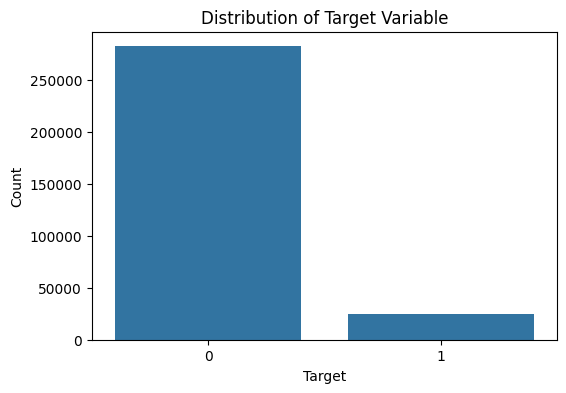

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=application_df_cleaned)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

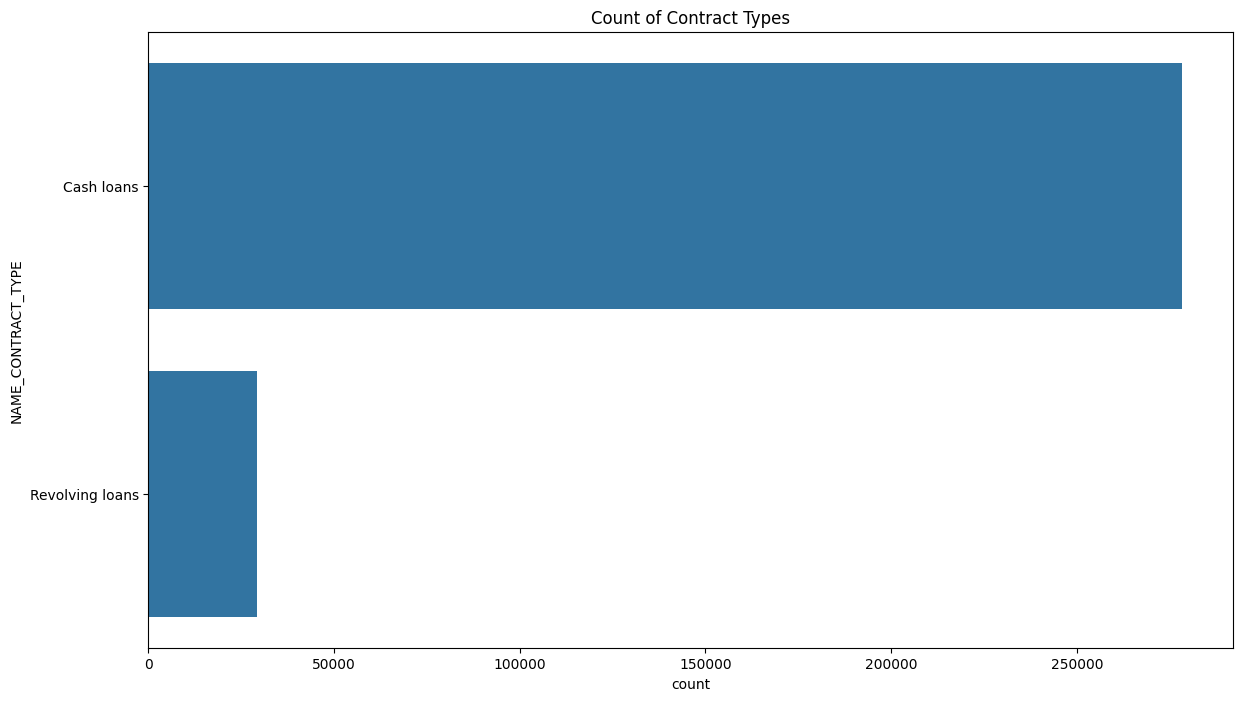

In [ ]:
# Bar charts for categorical variables
plt.figure(figsize=(14, 8))
sns.countplot(y='NAME_CONTRACT_TYPE', data=application_df_cleaned, order=application_df_cleaned['NAME_CONTRACT_TYPE'].value_counts().index)
plt.title('Count of Contract Types')
plt.show()

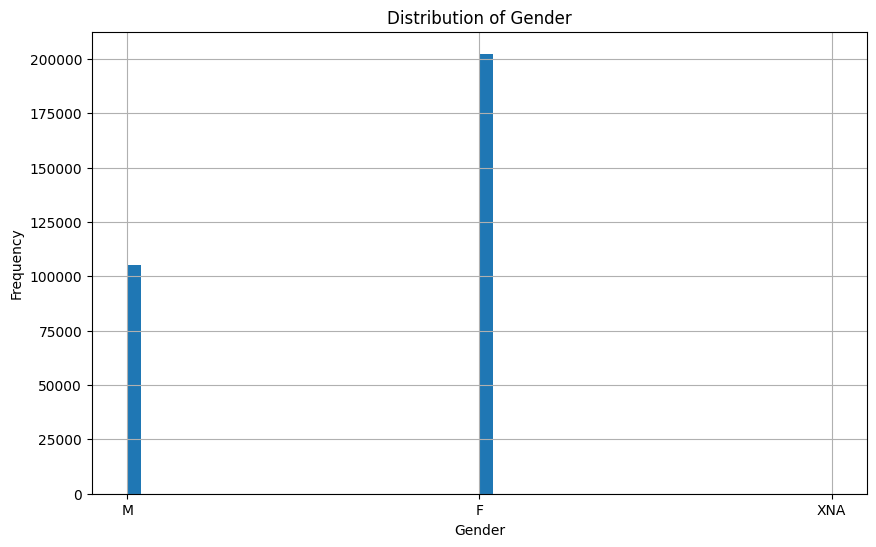

In [ ]:
# Histograms for numerical variables
plt.figure(figsize=(10, 6))
application_df_cleaned['CODE_GENDER'].hist(bins=50)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

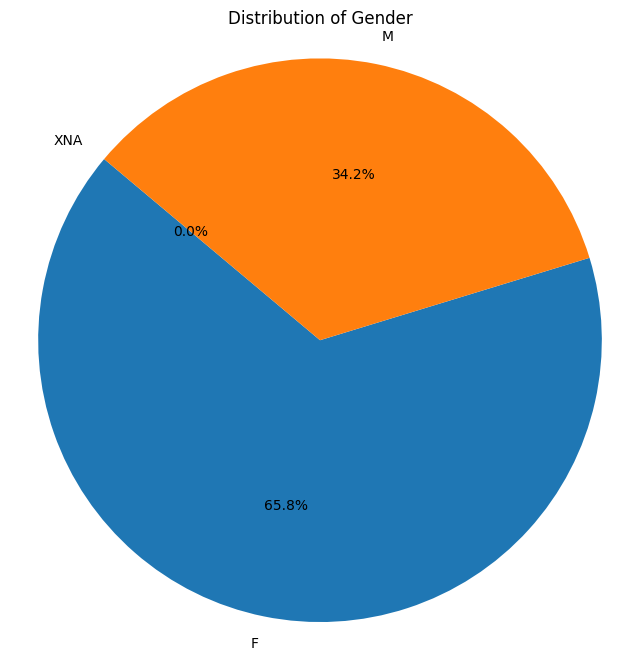

In [ ]:
# Pie chart for 'CODE_GENDER'
gender_counts = application_df_cleaned['CODE_GENDER'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Female Majority:

65.8% of the applicants are female. This indicates that a significant majority of the loan applicants in this dataset are women.

Male Applicants:

34.2% of the applicants are male. This shows that a smaller proportion of loan applicants are men compared to women.

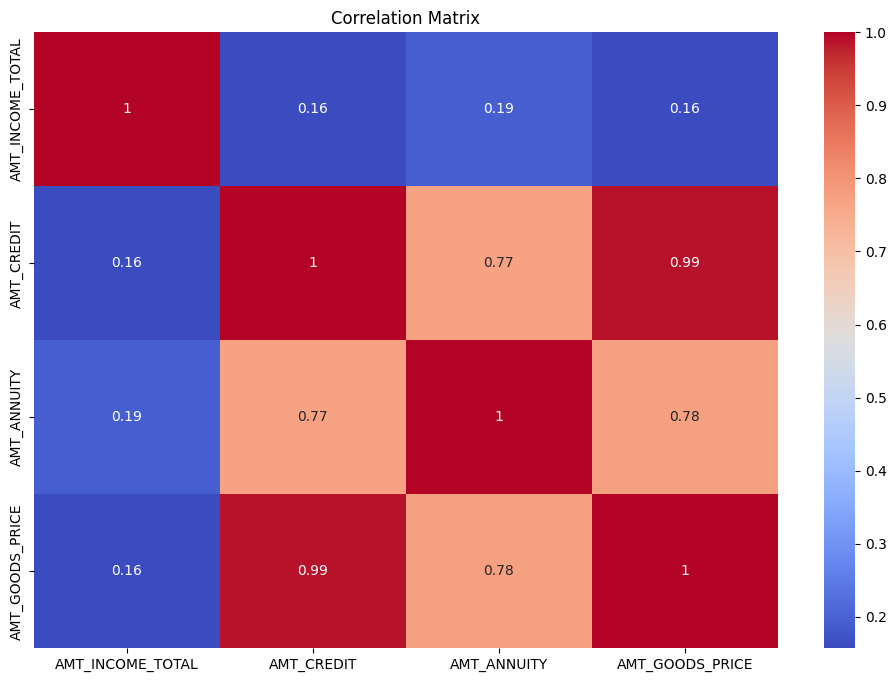

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(12, 8))
corr = application_df_cleaned[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

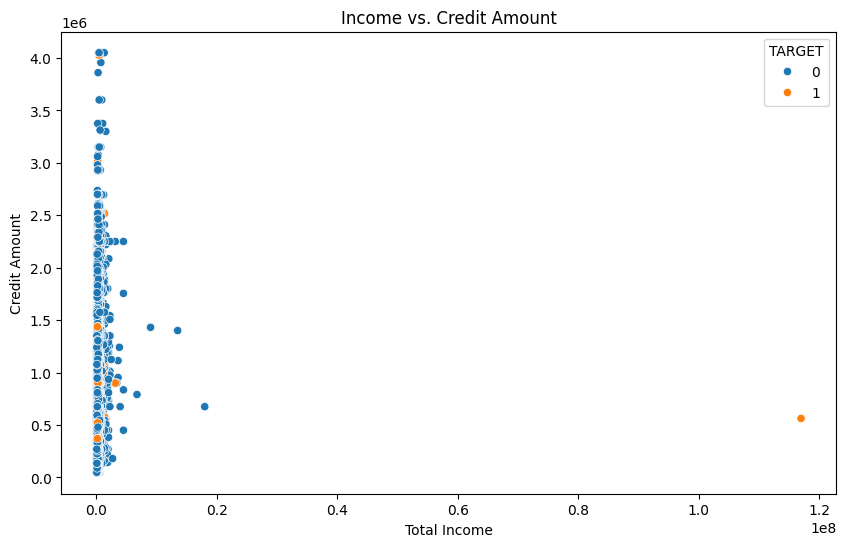

In [ ]:
# Scatter plot for Income vs. Credit Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET', data=application_df_cleaned)
plt.title('Income vs. Credit Amount')
plt.xlabel('Total Income')
plt.ylabel('Credit Amount')
plt.show()

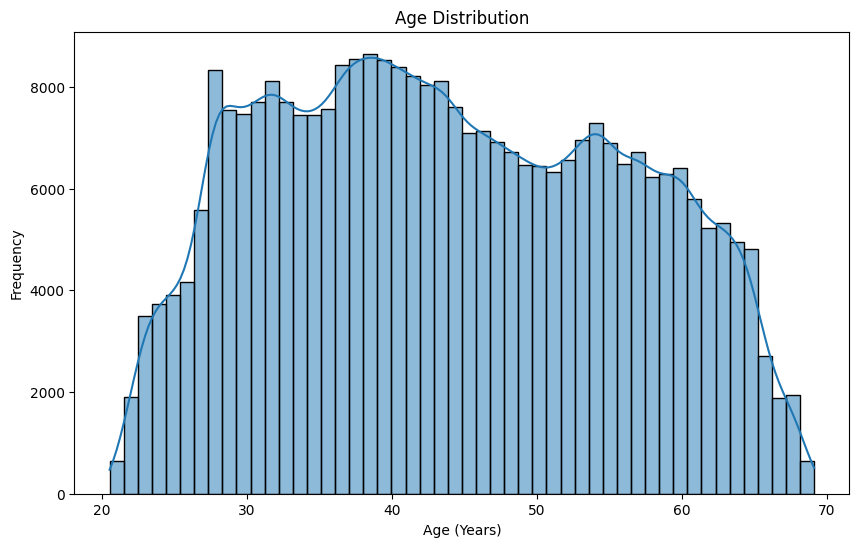

In [ ]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(application_df_cleaned['AGE_YEARS'], bins=50, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

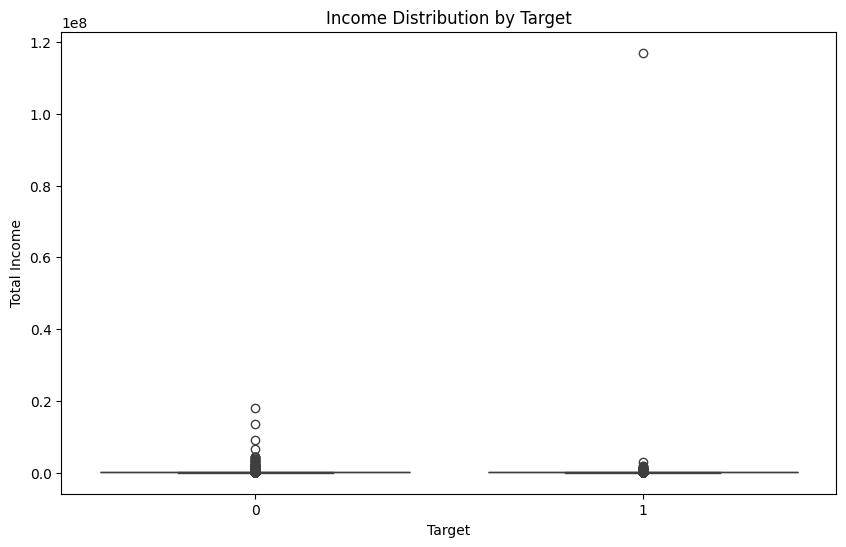

In [ ]:
# Boxplot for 'AMT_INCOME_TOTAL'
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=application_df_cleaned)
plt.title('Income Distribution by Target')
plt.xlabel('Target')
plt.ylabel('Total Income')
plt.show()

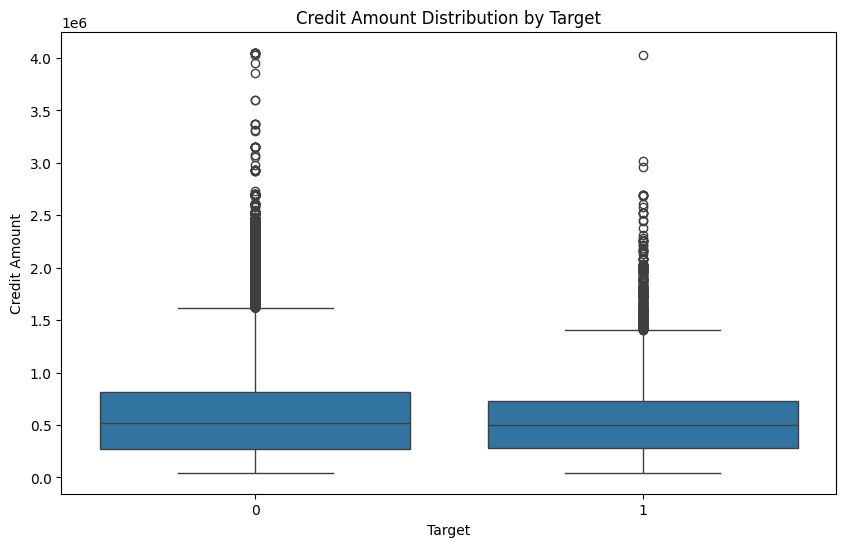

In [ ]:
# Boxplot for 'AMT_CREDIT'
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=application_df_cleaned)
plt.title('Credit Amount Distribution by Target')
plt.xlabel('Target')
plt.ylabel('Credit Amount')
plt.show()

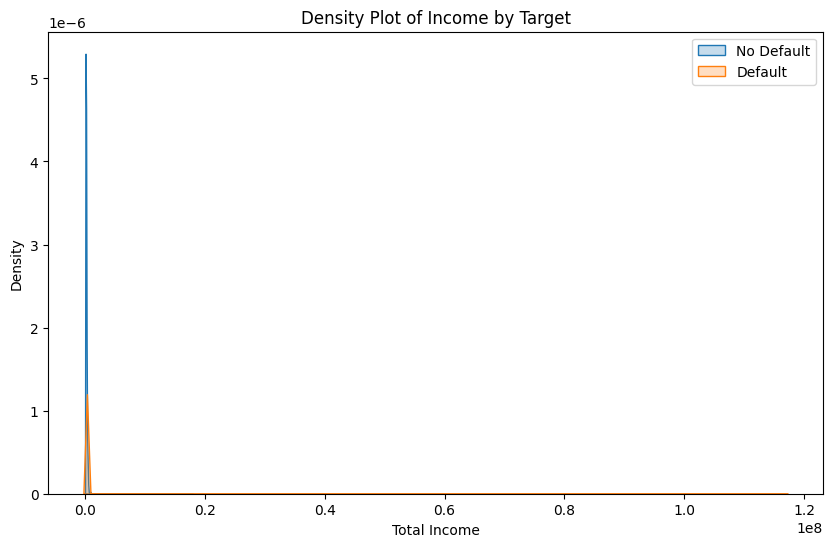

In [ ]:
# Density plot for 'AMT_INCOME_TOTAL'
plt.figure(figsize=(10, 6))
sns.kdeplot(application_df_cleaned[application_df_cleaned['TARGET'] == 0]['AMT_INCOME_TOTAL'], label='No Default', shade=True)
sns.kdeplot(application_df_cleaned[application_df_cleaned['TARGET'] == 1]['AMT_INCOME_TOTAL'], label='Default', shade=True)
plt.title('Density Plot of Income by Target')
plt.xlabel('Total Income')
plt.ylabel('Density')
plt.legend()
plt.show()



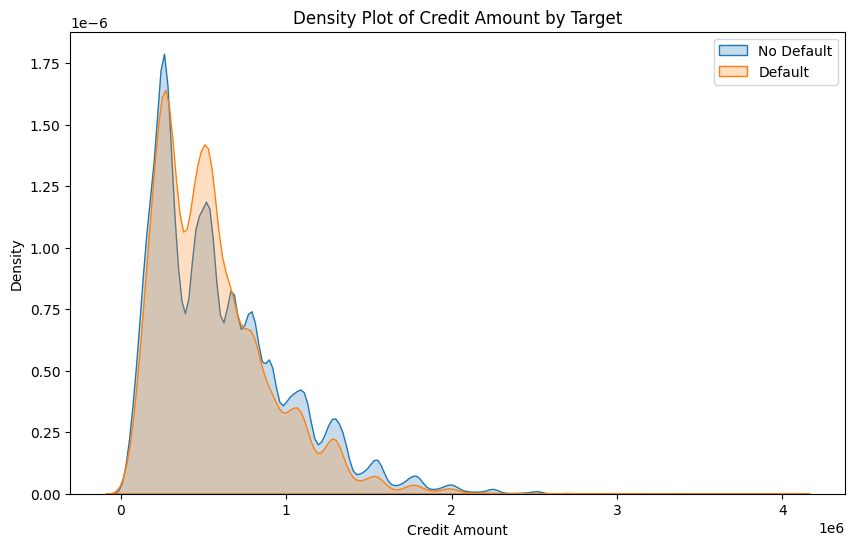

In [ ]:
# Density plot for 'AMT_CREDIT'
plt.figure(figsize=(10, 6))
sns.kdeplot(application_df_cleaned[application_df_cleaned['TARGET'] == 0]['AMT_CREDIT'], label='No Default', shade=True)
sns.kdeplot(application_df_cleaned[application_df_cleaned['TARGET'] == 1]['AMT_CREDIT'], label='Default', shade=True)
plt.title('Density Plot of Credit Amount by Target')
plt.xlabel('Credit Amount')
plt.ylabel('Density')
plt.legend()
plt.show()


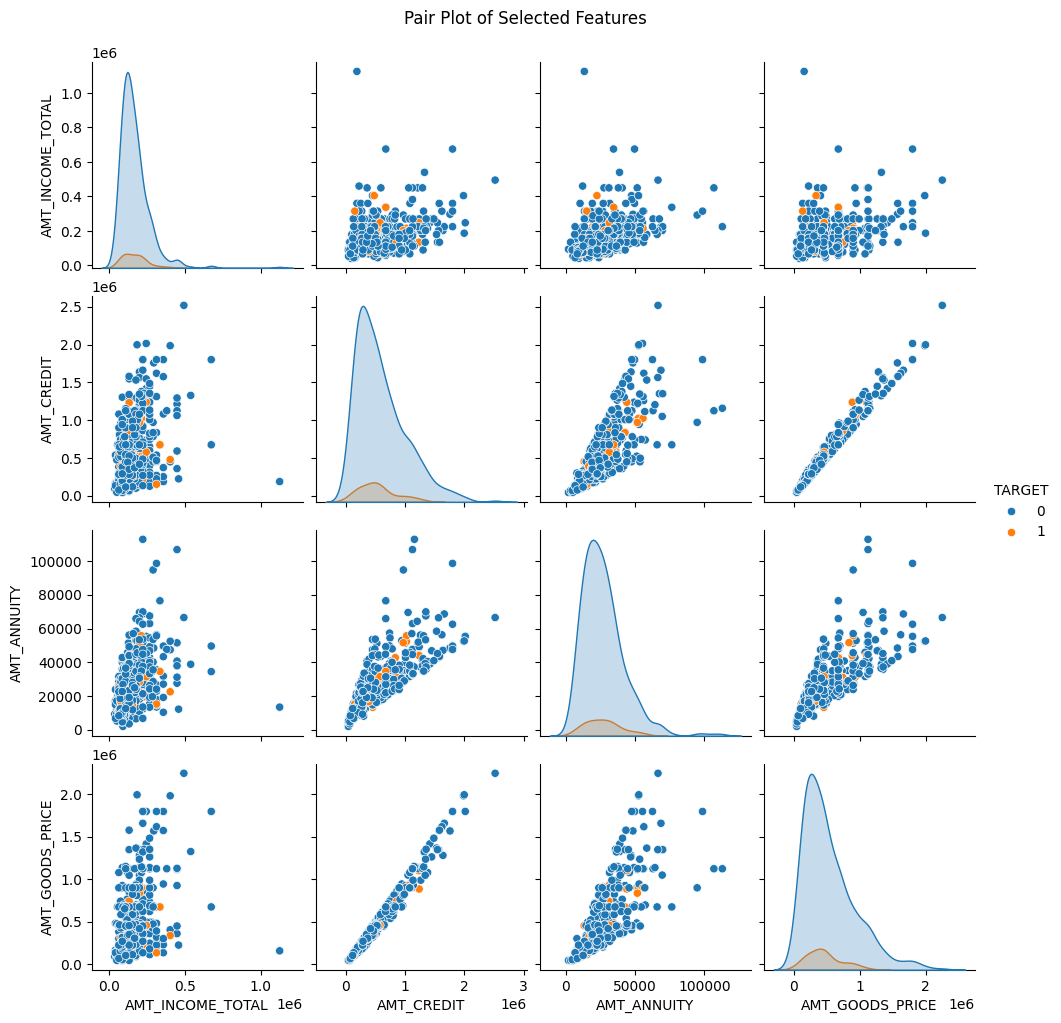

In [ ]:
# Pair plot
sample_df = application_df_cleaned[['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].sample(500)
sns.pairplot(sample_df, hue='TARGET')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

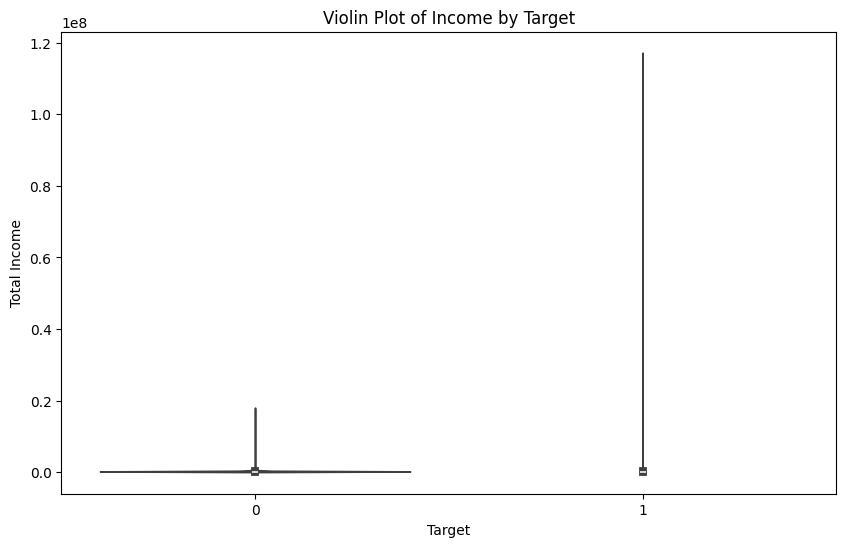

In [ ]:
# Violin plot for 'AMT_INCOME_TOTAL'
plt.figure(figsize=(10, 6))
sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=application_df_cleaned)
plt.title('Violin Plot of Income by Target')
plt.xlabel('Target')
plt.ylabel('Total Income')
plt.show()


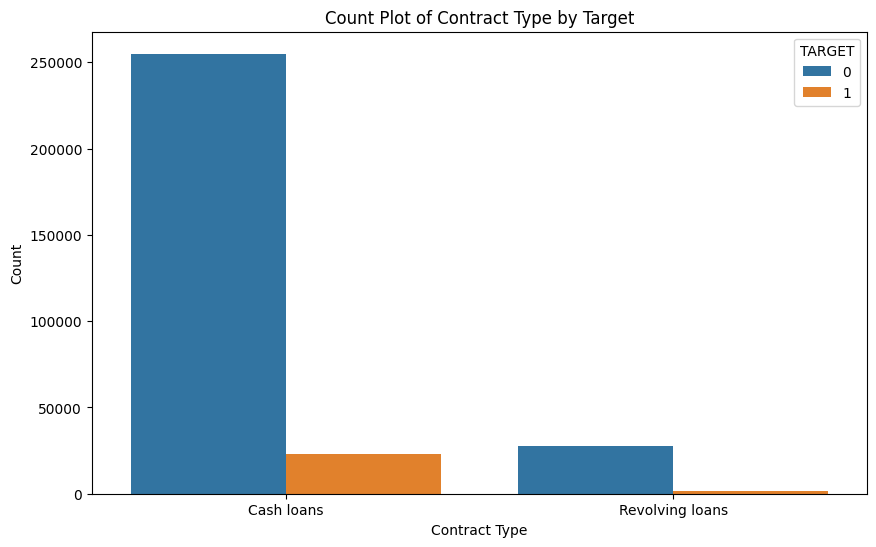

In [ ]:
# Count plot for 'NAME_CONTRACT_TYPE'
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=application_df_cleaned)
plt.title('Count Plot of Contract Type by Target')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

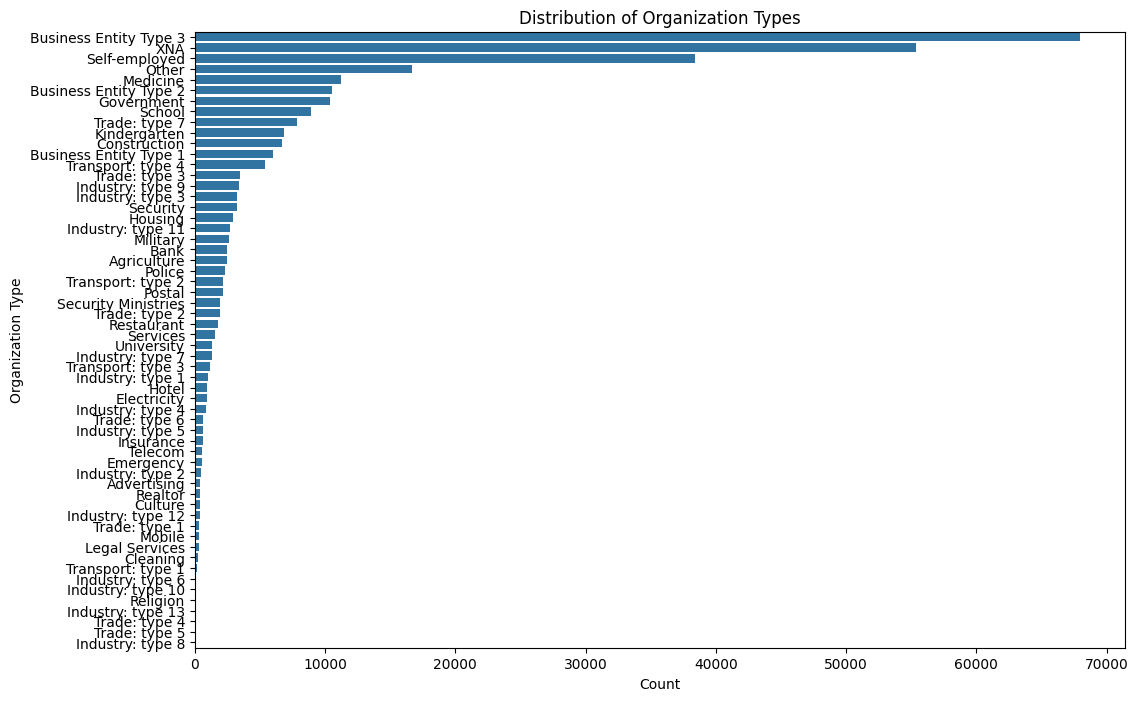

In [ ]:
# Bar chart for 'ORGANIZATION_TYPE'
plt.figure(figsize=(12, 8))
sns.countplot(y='ORGANIZATION_TYPE', data=application_df_cleaned, order=application_df_cleaned['ORGANIZATION_TYPE'].value_counts().index)
plt.title('Distribution of Organization Types')
plt.xlabel('Count')
plt.ylabel('Organization Type')
plt.show()

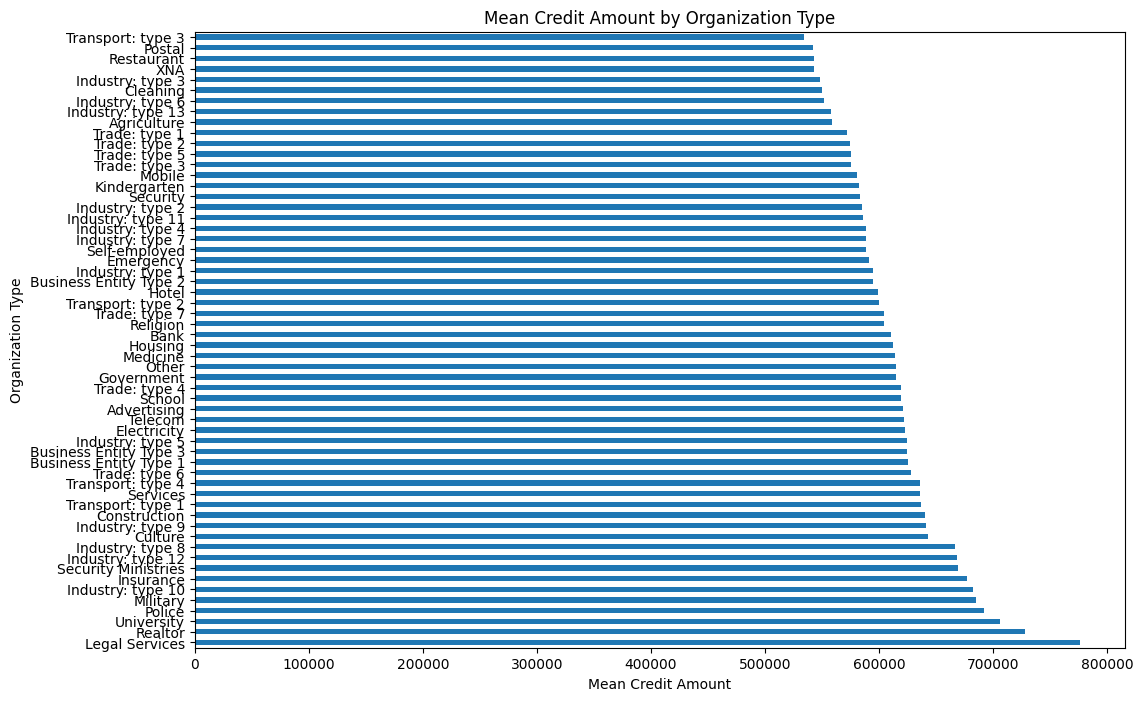

In [ ]:
# Mean 'AMT_CREDIT' by 'ORGANIZATION_TYPE'
mean_credit_by_org = application_df_cleaned.groupby('ORGANIZATION_TYPE')['AMT_CREDIT'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
mean_credit_by_org.plot(kind='barh')
plt.title('Mean Credit Amount by Organization Type')
plt.xlabel('Mean Credit Amount')
plt.ylabel('Organization Type')
plt.show()

### **Previous Application Data**

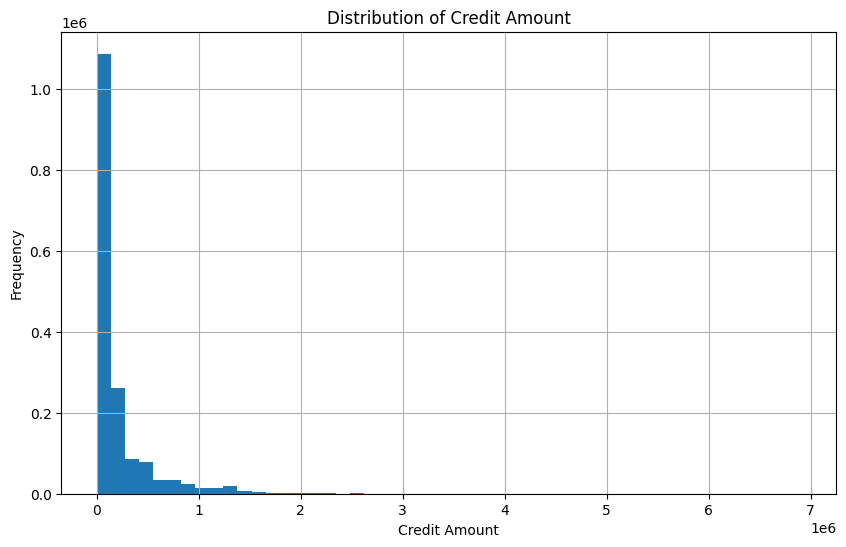

In [ ]:
# Histogram for 'AMT_CREDIT'
plt.figure(figsize=(10, 6))
previous_df_cleaned['AMT_CREDIT'].hist(bins=50)
plt.title('Distribution of Credit Amount')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()

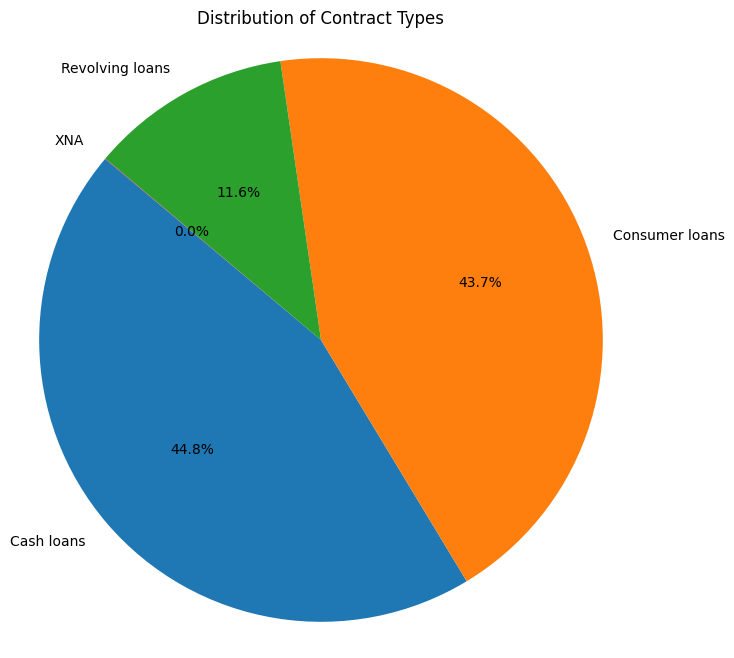

In [ ]:
# Pie chart for 'NAME_CONTRACT_TYPE'
contract_type_counts = previous_df_cleaned['NAME_CONTRACT_TYPE'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(contract_type_counts, labels=contract_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Contract Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


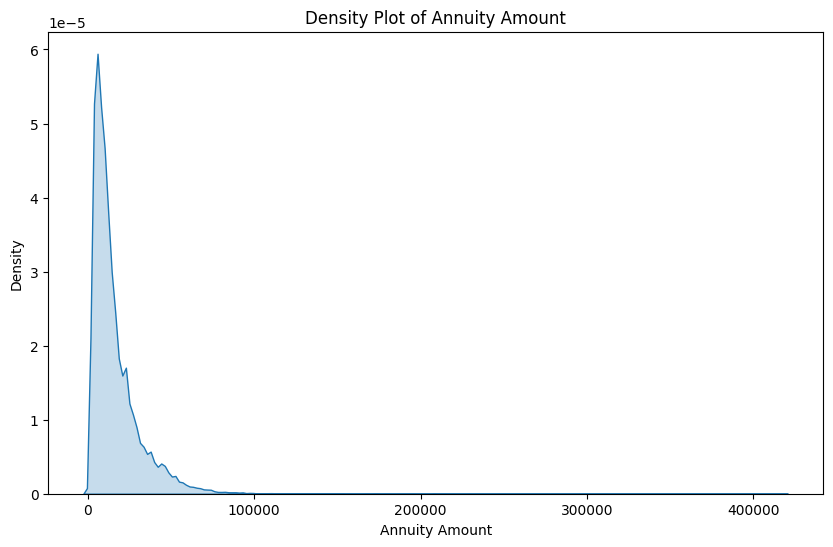

In [ ]:
# Density plot for 'AMT_ANNUITY'
plt.figure(figsize=(10, 6))
sns.kdeplot(previous_df_cleaned['AMT_ANNUITY'], shade=True)
plt.title('Density Plot of Annuity Amount')
plt.xlabel('Annuity Amount')
plt.ylabel('Density')
plt.show()


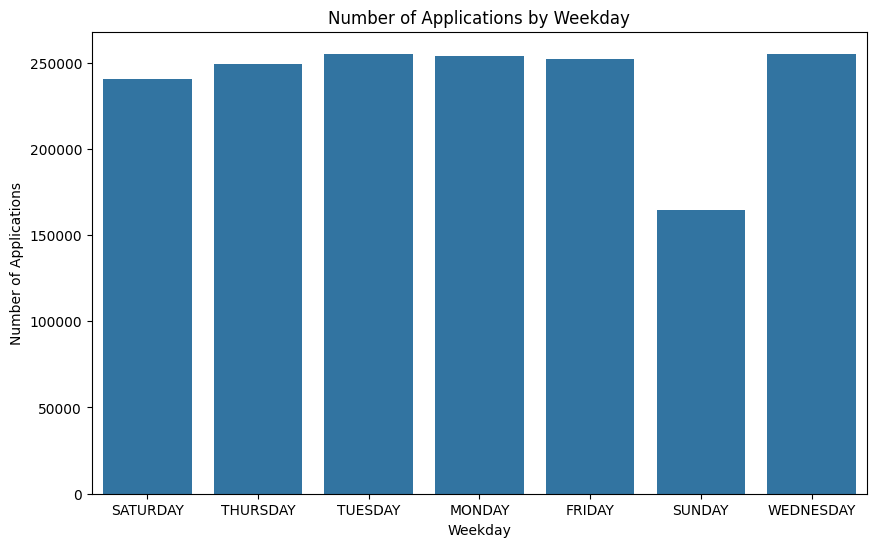

In [ ]:
# Bar chart for 'WEEKDAY_APPR_PROCESS_START'
plt.figure(figsize=(10, 6))
sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data=previous_df_cleaned)
plt.title('Number of Applications by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Applications')
plt.show()

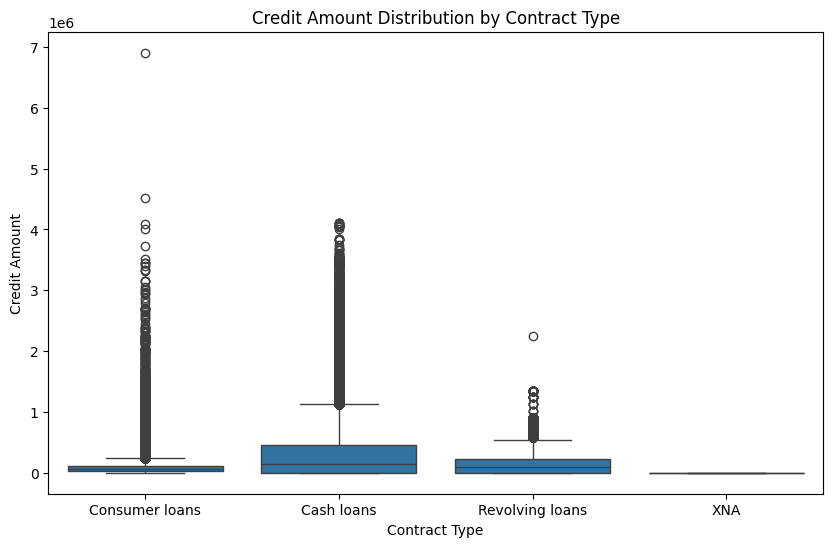

In [ ]:
# Boxplot for 'AMT_CREDIT'
plt.figure(figsize=(10, 6))
sns.boxplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', data=previous_df_cleaned)
plt.title('Credit Amount Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Credit Amount')
plt.show()

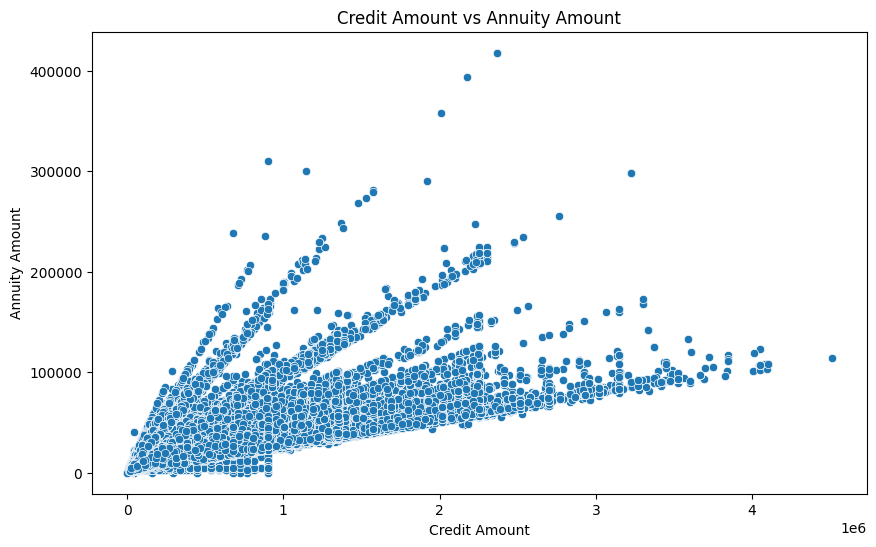

In [ ]:
# Scatter plot for 'AMT_CREDIT' vs 'AMT_ANNUITY'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_CREDIT', y='AMT_ANNUITY', data=previous_df_cleaned)
plt.title('Credit Amount vs Annuity Amount')
plt.xlabel('Credit Amount')
plt.ylabel('Annuity Amount')
plt.show()

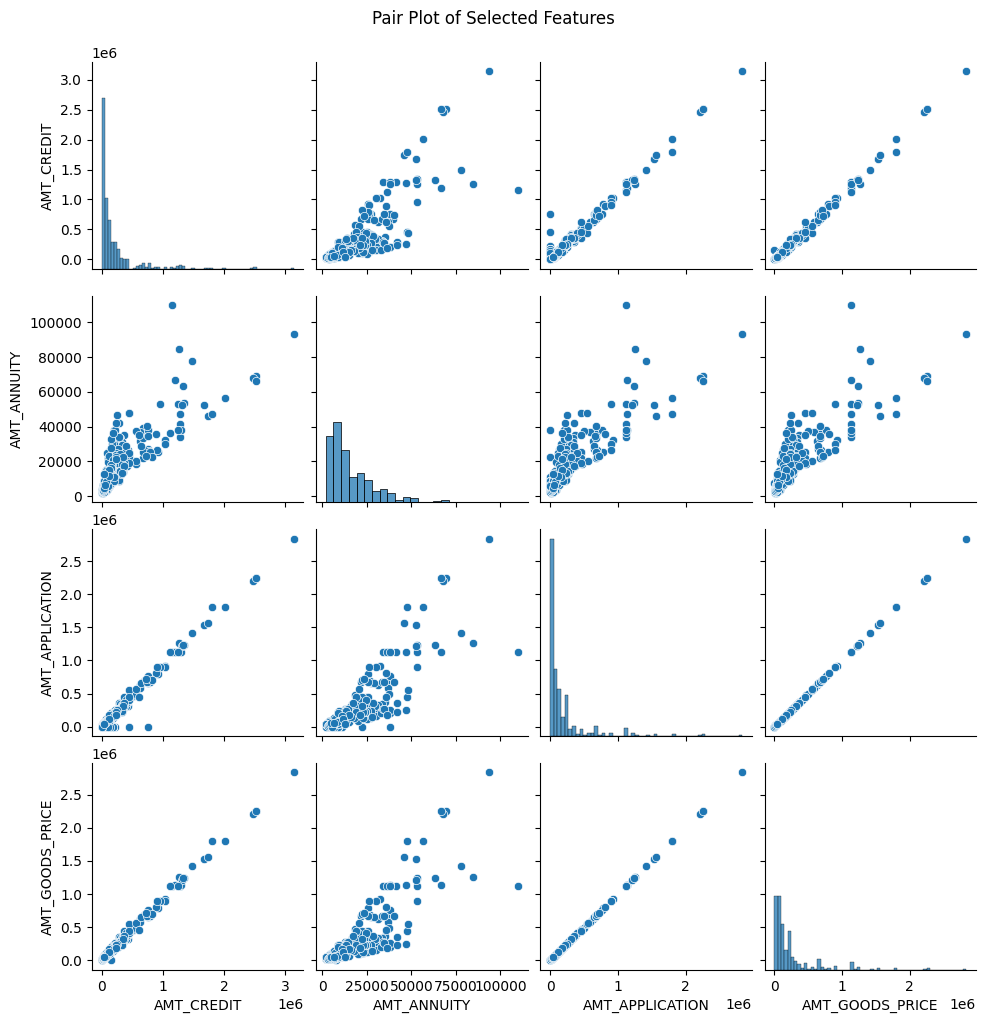

In [ ]:
# Pair plot
sample_df = previous_df_cleaned[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_GOODS_PRICE']].sample(500)
sns.pairplot(sample_df)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

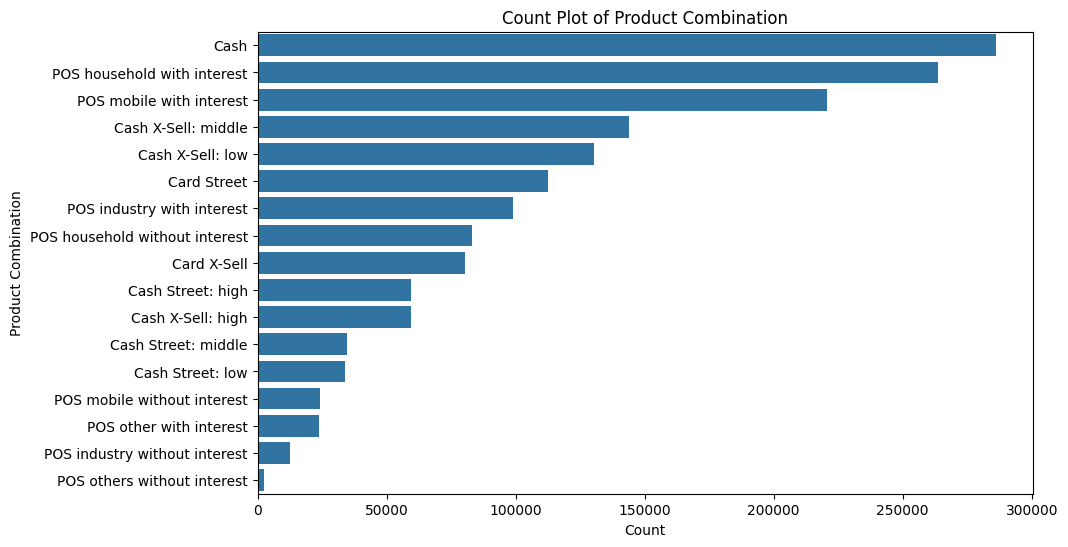

In [ ]:
# Count plot for 'PRODUCT_COMBINATION'
plt.figure(figsize=(10, 6))
sns.countplot(y='PRODUCT_COMBINATION', data=previous_df_cleaned, order=previous_df_cleaned['PRODUCT_COMBINATION'].value_counts().index)
plt.title('Count Plot of Product Combination')
plt.xlabel('Count')
plt.ylabel('Product Combination')
plt.show()